# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

NameError: name 'num_agents' is not defined

When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

The training of action-critic algorithm iterates the following flow:

* Gerante the experience tuples from interaction of agent to environment and save to a common replay buffer
* Sample a batch from replay buffer for learning (if the replay buffer is large enough)
* Update the critic:
    1. Get the action by feeding state into target actor 
    2. Get the action-value of next state/next action pair `Q_next`
    3. Update the 'actual' Q value for the current state/action pair as $Q\_current = r + \gamma*Q\_next$
    4. Feed the current state and current action into the local critic to get `Q_pred`
    5. Compute the MSE loss between `Q_current` and `Q_predicted`, and update the weights of the local critic
* Update the actor:
    1. Get the predicted actions for the current states based on the local actor
    2. Get the `Q-values` (expected reward) of these by passing the current states and predicted actions through the local critic
    3. Use the negative mean of the `Q-values` as a loss to update the weights of the local actor
    4. Update the actor and critic target network weights with soft update

In [4]:
agent = Agent(state_size=33, action_size=4, random_seed=0)
brain_name = env.brain_names[0]
#scores = []

def ddpg(agent, brain_name,  max_t = 1000, n_episodes=1500):
    """ Deep Deterministic Policy Gradient """
    

    # Save path 
    scores = [] # list containing scores from each episodes 
    scores_window = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes + 1):
    
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # get the current state
        state = env_info.vector_observations[0]
        agent.reset()
        score = 0
        
        for t in range(max_t):
            # choose actions
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            # take action 
            agent.step(state, action, reward, next_state, done)
            # accumulate rewards into score variable
            score += reward
            # set next_state
            state = next_state
            
            if done: 
                break
            
        # save acumulative reward
        scores.append(score)
        scores_window.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)),end="")
        
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(),   
                       "checkpoint_actor_" + str(i_episode) + ".pth")
            torch.save(agent.critic_local.state_dict(),  
                       "checkpoint_critic_" + str(i_episode) + ".pth")
 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        # Check if task done with average score over 100 episodes >= 30
        if  np.mean(scores_window) >= 30:
            print("\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}".format(
            i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), "checkpoint_actor_solved.pth")
            torch.save(agent.critic_local.state_dict(), "checkpoint_critic_solved.pth")
            flag = True
            break  
                
    return scores

In [9]:
# plot the scores
def show_plot(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()


128 0.99 0.005 0.0001 0.0001 1e-05
Episode 100	Average Score: 1.460
Episode 200	Average Score: 4.501
Episode 300	Average Score: 5.562
Episode 400	Average Score: 4.685
Episode 500	Average Score: 3.580
Episode 600	Average Score: 5.667
Episode 700	Average Score: 6.465
Episode 800	Average Score: 5.903
Episode 900	Average Score: 5.836
Episode 1000	Average Score: 5.284


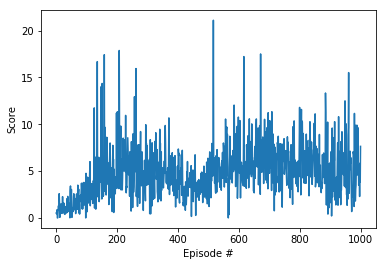

128 0.99 0.01 0.0001 0.0001 1e-05
Episode 100	Average Score: 2.301
Episode 200	Average Score: 7.021
Episode 300	Average Score: 10.902
Episode 400	Average Score: 14.721
Episode 500	Average Score: 19.277
Episode 600	Average Score: 20.848
Episode 700	Average Score: 21.036
Episode 800	Average Score: 26.162
Episode 900	Average Score: 23.692
Episode 1000	Average Score: 26.552


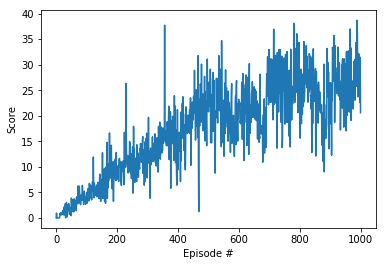

128 0.99 0.02 0.0001 0.0001 1e-05
Episode 100	Average Score: 2.625
Episode 200	Average Score: 8.885
Episode 300	Average Score: 14.390
Episode 400	Average Score: 18.749
Episode 500	Average Score: 23.317
Episode 600	Average Score: 26.058
Episode 700	Average Score: 27.423
Episode 800	Average Score: 27.600
Episode 900	Average Score: 29.046
Episode 1000	Average Score: 28.203


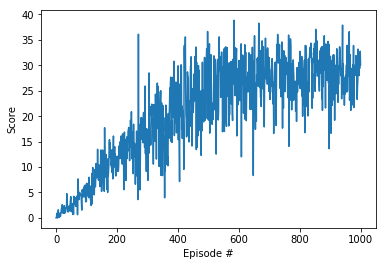

CPU times: user 5h 6min 21s, sys: 31min 48s, total: 5h 38min 9s
Wall time: 6h 11min 38s


In [21]:
%%time
print( 128, 0.99,  0.005, 1e-4,  1e-4,  1e-5)
agent = Agent(state_size=33, action_size=4, random_seed=0,
                batch_size=128, gamma = 0.99, tau = 0.005,
                lr_actor=1e-4, lr_critic=1e-4, weight_decay=1e-5)
brain_name = env.brain_names[0]
scores1 = ddpg(agent=agent, brain_name=brain_name)
show_plot(scores1)

print( 128, 0.99,  0.01, 1e-4,  1e-4,  1e-5)
agent = Agent(state_size=33, action_size=4, random_seed=0,
                batch_size=128, gamma = 0.99, tau = 0.01,
                lr_actor=1e-4, lr_critic=1e-4, weight_decay=1e-5)
brain_name = env.brain_names[0]
scores2 = ddpg(agent=agent, brain_name=brain_name)
show_plot(scores2)

print( 128, 0.99,  0.02, 1e-4,  1e-4,  1e-5)
agent = Agent(state_size=33, action_size=4, random_seed=0,
                batch_size=128, gamma = 0.99, tau = 0.02,
                lr_actor=1e-4, lr_critic=1e-4, weight_decay=1e-5)
brain_name = env.brain_names[0]
scores3 = ddpg(agent=agent, brain_name=brain_name)
show_plot(scores3)

In [7]:
print( 256, 0.99,  0.008, 1e-4,  1e-4,  1e-5) #tau 0.008
agent = Agent(state_size=33, action_size=4, random_seed=0,
                batch_size=256, gamma = 0.99, tau = 0.008,
                lr_actor=1e-4, lr_critic=1e-4, weight_decay=1e-5)
brain_name = env.brain_names[0]
scores4 = ddpg(agent=agent, brain_name=brain_name)

256 0.99 0.008 0.0001 0.0001 1e-05
Episode 100	Average Score: 2.213
Episode 200	Average Score: 7.205
Episode 300	Average Score: 10.180
Episode 400	Average Score: 14.691
Episode 500	Average Score: 21.181
Episode 600	Average Score: 26.539
Episode 700	Average Score: 29.677
Episode 706	Average Score: 30.013
Environment solved in 606 episodes!	Average Score: 30.013


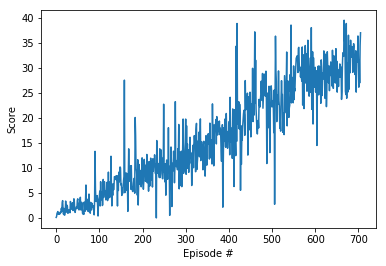

In [10]:
show_plot(scores4)

In [ ]:
print( 512, 0.99,  0.01, 1e-4,  1e-4,  1e-5)
agent = Agent(state_size=33, action_size=4, random_seed=0,
                batch_size=512, gamma = 0.99, tau = 0.05,
                lr_actor=1e-4, lr_critic=1e-4, weight_decay=1e-5)
brain_name = env.brain_names[0]
scores5 = ddpg(agent=agent, brain_name=brain_name)
show_plot(scores5)

512 0.99 0.05 0.0001 0.0001 1e-05
Episode 100	Average Score: 1.743
Episode 200	Average Score: 4.766
Episode 300	Average Score: 6.987
Episode 317	Average Score: 6.920

In [ ]:
print( 128, 0.99,  0.04, 1e-4,  1e-4,  1e-5)
agent = Agent(state_size=33, action_size=4, random_seed=0,
                batch_size=128, gamma = 0.99, tau = 0.008,
                lr_actor=1e-4, lr_critic=1e-4, weight_decay=1e-5)
brain_name = env.brain_names[0]
scores5 = ddpg(agent=agent, brain_name=brain_name)
show_plot(scores5 )

In [7]:
# Watch how the trained Agent performs in the environment

agent.actor_local.load_state_dict(torch.load('checkpoint_actor_solved.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_solved.pth'))
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)       # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.1599999964237213


In [10]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=400, fc2_units=200):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.norm1 = nn.BatchNorm2d(fc1_units)
        self.norm2 = nn.BatchNorm2d(fc2_units)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.leaky_relu(self.norm1(self.fc1(state)))
        x = F.leaky_relu(self.norm2(self.fc2(x)))
        return F.tanh(self.fc3(x))


In [11]:
print(Actor(33, 4, 0))

Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=4, bias=True)
  (norm1): BatchNorm2d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
